# Natural Language Processing - Word Embedding
# FEEC/Unicamp - July/2020
### Based on https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc
### Based on https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb
### Based on https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [ ]:
# Imports needed and logging
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

data_file="reviews_data.txt.gz" # Please, define the working directory appropriately

with gzip.open ('reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

Saving reviews_data.txt.gz to reviews_data.txt.gz
b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not

In [ ]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2021-05-23 17:20:34,255 : INFO : reading file reviews_data.txt.gz...this may take a while
2021-05-23 17:20:34,259 : INFO : read 0 reviews
2021-05-23 17:20:36,450 : INFO : read 10000 reviews
2021-05-23 17:20:38,658 : INFO : read 20000 reviews
2021-05-23 17:20:41,200 : INFO : read 30000 reviews
2021-05-23 17:20:43,558 : INFO : read 40000 reviews
2021-05-23 17:20:46,164 : INFO : read 50000 reviews
2021-05-23 17:20:48,684 : INFO : read 60000 reviews
2021-05-23 17:20:51,120 : INFO : read 70000 reviews
2021-05-23 17:20:53,050 : INFO : read 80000 reviews
2021-05-23 17:20:55,108 : INFO : read 90000 reviews
2021-05-23 17:20:57,120 : INFO : read 100000 reviews
2021-05-23 17:20:59,109 : INFO : read 110000 reviews
2021-05-23 17:21:01,120 : INFO : read 120000 reviews
2021-05-23 17:21:03,179 : INFO : read 130000 reviews
2021-05-23 17:21:05,384 : INFO : read 140000 reviews
2021-05-23 17:21:07,436 : INFO : read 150000 reviews
2021-05-23 17:21:10,067 : INFO : read 160000 reviews
2021-05-23 17:21:12,097

In [ ]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2021-05-23 17:21:30,957 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2021-05-23 17:21:30,962 : INFO : collecting all words and their counts
2021-05-23 17:21:30,964 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-23 17:21:31,325 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2021-05-23 17:21:31,720 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2021-05-23 17:21:32,129 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2021-05-23 17:21:32,499 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2021-05-23 17:21:32,927 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2021-05-23 17:21:33,330 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2021-05-23 17:21:33,683 : INFO : PROGRESS: a

(303491512, 415193580)

In [ ]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2021-05-23 17:43:15,413 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8717060685157776),
 ('unclean', 0.7820265293121338),
 ('smelly', 0.7627125978469849),
 ('stained', 0.7624809741973877),
 ('grubby', 0.7533421516418457),
 ('dusty', 0.7511833310127258),
 ('disgusting', 0.7227547764778137),
 ('dingy', 0.7222506403923035),
 ('soiled', 0.706889808177948),
 ('grimy', 0.705750584602356)]

In [ ]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9181456565856934),
 ('friendly', 0.8280215263366699),
 ('cordial', 0.8150797486305237),
 ('professional', 0.785573422908783),
 ('curteous', 0.7616740465164185),
 ('attentive', 0.7598661184310913)]

In [ ]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('germany', 0.6903308033943176),
 ('canada', 0.6332639455795288),
 ('spain', 0.6206792593002319),
 ('gaulle', 0.6028624176979065),
 ('mexico', 0.5956234335899353),
 ('florida', 0.5870181322097778)]

In [ ]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('horrified', 0.7929807305335999),
 ('astonished', 0.7850951552391052),
 ('amazed', 0.7790320515632629),
 ('dismayed', 0.7551326155662537),
 ('stunned', 0.7491369247436523),
 ('appalled', 0.7476714253425598)]

In [ ]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.7240311503410339),
 ('quilt', 0.7158676385879517),
 ('matress', 0.7017998695373535),
 ('mattress', 0.7000172138214111),
 ('blanket', 0.6868237257003784),
 ('pillowcase', 0.6713007092475891),
 ('sheets', 0.645737886428833),
 ('pillows', 0.6279627680778503),
 ('satin', 0.6241366267204285),
 ('foam', 0.6221047043800354)]

In [ ]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.76271254

In [ ]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'shower'

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

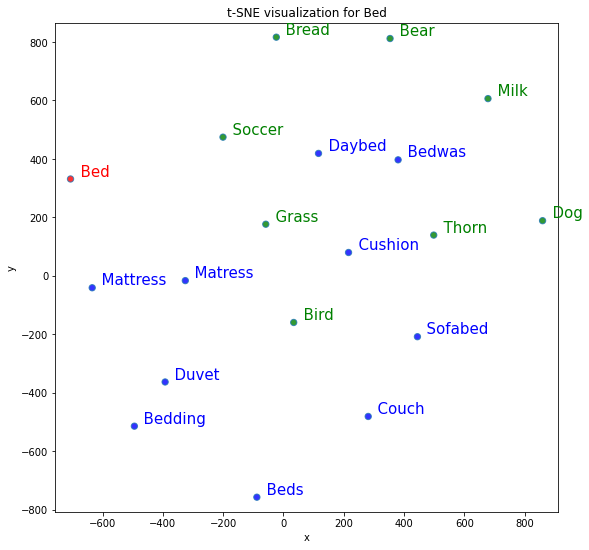

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt

tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

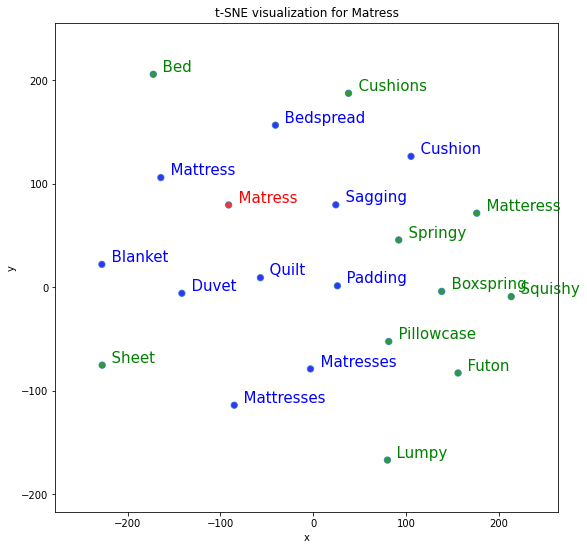

In [ ]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])

-----------------------------
#### Discussões dos Resultados



* **Word2Vec:** Consiste numa arquitetuta codificador-decodificador, com gargalo de dimensão reduzida (50 a 300, geralmente) que mapeia palavras recebidas como entrada (na formulação one-hot) em um espaço de condificação densa (word embedding).  Neste espaço é possível realizar operações semânticas na linguagem com operadores aritméticos, podendo ser percebido inclusive realações de vizinhaças entre palavras. No caso de estudo em questão a entrada é constituida de sentenças inteiras, recebendo assim inúmeros vetores de entrada, de modo que é utilizada a arquitetura Continuous Bag of Words (CBOW). Neste modelo, as palavras adjacentes são combinadas para prever a palavra no meio, aproveitando assim o contexto da frase.
* **t-SNE:** t-distributed Stochastic Neighbor Embedding (t-SNE) é um método de projeção de espaços de dimensão elevadas em mapas 1D, 2D ou 3D. A técnica utiliza um kernel gaussiano para converter pontos em altas dimensões para probabilidades de conexões (P) e um kernel t-Student, com 1 grau de liberdade (v), para representar as probabilidades de conexões entre os pontos em baixas dimensões (Q), no espaço mapeado. A localização dos pontos mapeados são determinados pela minimização do divergente de Kullback–Leibler da distribuição P em realção a Q. O t-SNE realiza esse processo de forma iterativa, com um chute inicial do mapeamento. Essencialmente:
  1. Dado um conjunto X={x1,...,xn}, com xi de dimensão M, primeiro são calculadas as probabilidades pij, que representam a similidade entre xi e xj.
  2. A técnica deseja obter um mapeamento Y={y1,...,yn}, com yi de dimensão d,  que melhor reflete as similaridades pij. Para isso é medida a similaridade qij (no espaço reduzido), de forma similar à pij.
  3. Com qij  e pij, é utilizado o gradiente decendente no divergente de Kullback–Leibler para minimiza-lo. O resultado da otimização é o mapeamento desejado.
  
* Resultados do mapeamento:
  * "dirty" é similar a {"filthy", "unclean", "smelly", "stained", "grubby", "dusty", "disgusting", "dingy", "soiled" e "grimy"}. Essencialmente, todas essas palavras remetem ao mesmo sentido de "dirty". 
  * "polite" é similar a {"courteous", "friendly", "cordial", "professional", "courteous", "attentive"}. Mais uma vez, as palavras compartilham da mesma semântica, em que todas elas remetem à características positivas bastante proximas.
  * "france" é similar a {"germany", "canada", "spain", "gaulle", "mexico", "florida"}. Nota-se que a palavra "france" é similar à locais geográficos, destes quase todos países.
 * "shocked" é similar a {"hirrified", "astonished", "amazed", "dismayed", "stunned", "appaled"}. Todas as palavras expressam sentimentos/reações de surpresa ou espanto. 
 * Palavras relacinadas a coisas de cama:{ "duvet", "quilt", "matress", "blanket", "pillowcase", "sheets", "pillowcase", "sheets", "pillows", "satin", "foam"}. Nota-se que todos esses objetos estão relacionados à cama. 
 * Similaridade entre "durty" e "smelly" foi de 0.76271254. O que se justifica, por serem bastante parecidos. 
 * Para o conjunto {"bed","pillow","duvet","shower'} foi apontado que "shower" é a palavra que mais distoa. 
* Todos esses exemplos abordados indicam que o espaço de codificação gerado pelo Word2Vec é bastante competente, pois carrega o valor semântico das palavras. O mapeamento gerado pode ser observada em projeções 2D geradas pela técnica t-SNE. Foram apresentados mapeamentos para as palavras "bed" e "Maltress", suas respectivas palavras mais similares, e palavras quaisquer.  Nessas visualizações palavras com semanticas semelhantes aparecem mapeadas mais próximas umas das outras, enquanto palavras não relacionadas aparecem consideravelmente mais distantes.   

  

  
  